<a href="https://colab.research.google.com/github/krishnaprasad20/Stock_Price_Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STOCK PRICE PREDICION**



*   Detailed analysis of one stock



In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [75]:
df = pd.read_csv("/content/stock_data.csv")
df.head()

,Stock,Date,Open,High,Low,Close,Volume
0,TCS,2024-03-01,104.95,114.93,99.98,107.46,1627351
1,TCS,2024-03-02,137.28,137.38,132.08,134.73,1783478
2,TCS,2024-03-03,140.69,140.97,138.82,139.89,1854311
3,TCS,2024-03-04,120.89,128.11,114.92,121.52,1999576
4,TCS,2024-03-05,116.24,123.51,110.37,116.94,1957167


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Stock   450 non-null    object 
 1   Date    450 non-null    object 
 2   Open    450 non-null    float64
 3   High    450 non-null    float64
 4   Low     450 non-null    float64
 5   Close   450 non-null    float64
 6   Volume  450 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 24.7+ KB


In [77]:
df.shape

(450, 7)

In [78]:
df.columns

Index(['Stock', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [79]:
stock_df = df[df['Stock'] == 'INFY'].copy()
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df = stock_df.sort_values('Date')

stock_df['MA_5'] = stock_df['Close'].rolling(window=5).mean()
stock_df['MA_10'] = stock_df['Close'].rolling(window=10).mean()
stock_df['Daily_Return'] = stock_df['Close'].pct_change()
stock_df['Target'] = stock_df['Close'].shift(-1)
stock_df.dropna(inplace=True)

In [80]:
X = stock_df[['Open', 'High', 'Low', 'Close', 'Volume', 'MA_5', 'MA_10', 'Daily_Return']]
y = stock_df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [82]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 17.01


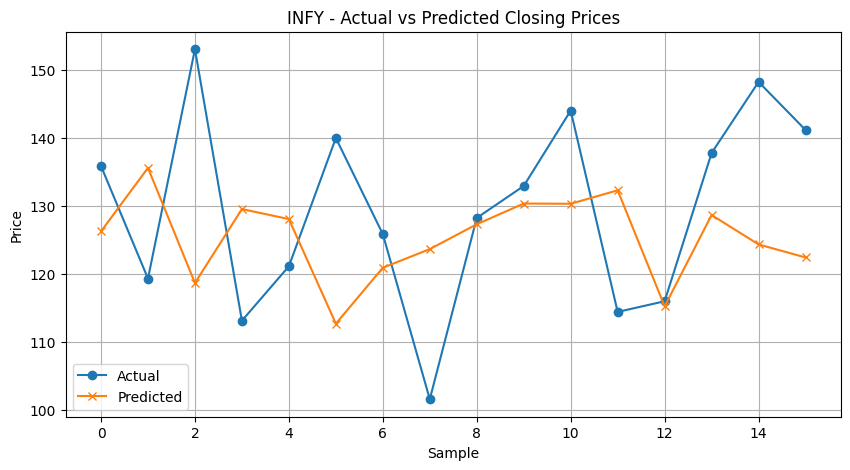

In [83]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('INFY - Actual vs Predicted Closing Prices')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()



*   **Buy or sell signal**



In [84]:
results = X_test.copy()
results['Actual_Close'] = y_test
results['Predicted_Close'] = y_pred
results['Signal'] = np.where(results['Predicted_Close'] > results['Actual_Close'], 'Buy', 'Sell')

print(results[['Actual_Close', 'Predicted_Close', 'Signal']].head(10))


     Actual_Close  Predicted_Close Signal
129        135.82       126.219513   Sell
99         119.28       135.551071    Buy
121        152.99       118.636533   Sell
130        113.09       129.495470    Buy
117        121.09       128.028173    Buy
127        139.94       112.655453   Sell
109        125.81       120.874097   Sell
169        101.55       123.614417    Buy
103        128.19       127.262469   Sell
111        132.89       130.308525   Sell


**Investment Recommendation Based On Average Returns**






In [85]:

df['Date'] = pd.to_datetime(df['Date'])

stock_names = df['Stock'].unique()

stock_summary = []


In [86]:


stock_summary = []

for stock in stock_names:
    stock_df = df[df['Stock'] == stock].copy()
    stock_df = stock_df.sort_values('Date')

    stock_df['MA_5'] = stock_df['Close'].rolling(window=5).mean()
    stock_df['MA_10'] = stock_df['Close'].rolling(window=10).mean()
    stock_df['Daily_Return'] = stock_df['Close'].pct_change()
    stock_df['Target'] = stock_df['Close'].shift(-1)
    stock_df.dropna(inplace=True)

    X = stock_df[['Open', 'High', 'Low', 'Close', 'Volume', 'MA_5', 'MA_10', 'Daily_Return']]
    y = stock_df['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    avg_return = stock_df['Daily_Return'].mean() * 100

    stock_summary.append({
        'Stock': stock,
        'RMSE': round(rmse, 2),
        'Average_Return (%)': round(avg_return, 2)
    })




In [87]:
summary_df = pd.DataFrame(stock_summary)
summary_df = summary_df.sort_values(by='Average_Return (%)', ascending=False)
print(" Investment Recommendation based on average returns:")
print(summary_df)

best_stock = summary_df.iloc[0]['Stock']
print(f"\n✅ Best stock to consider for investment: {best_stock}")


 Investment Recommendation based on average returns:
      Stock   RMSE  Average_Return (%)
2  RELIANCE  17.64                1.78
4     WIPRO  14.50                1.32
3      HDFC  14.18                1.30
1      INFY  17.01                1.18
0       TCS  14.30                1.02

✅ Best stock to consider for investment: RELIANCE


**Visualization for All Stocks**

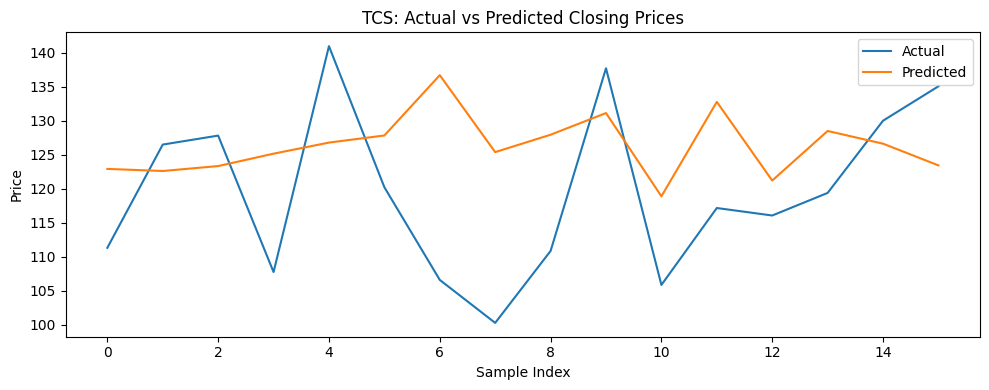

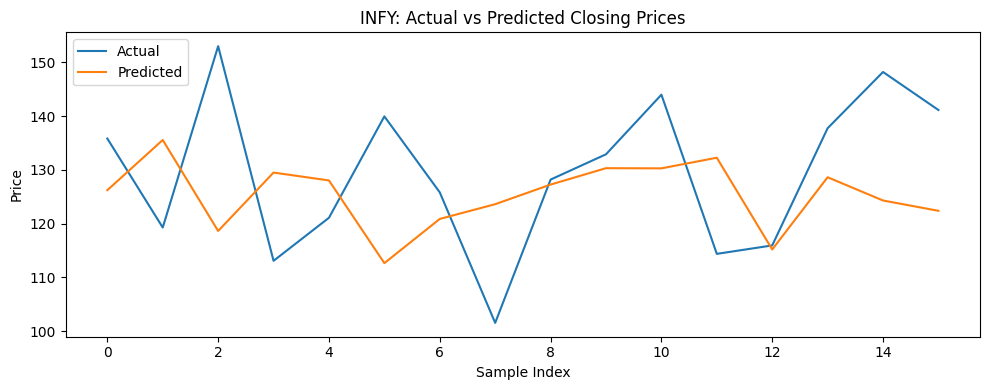

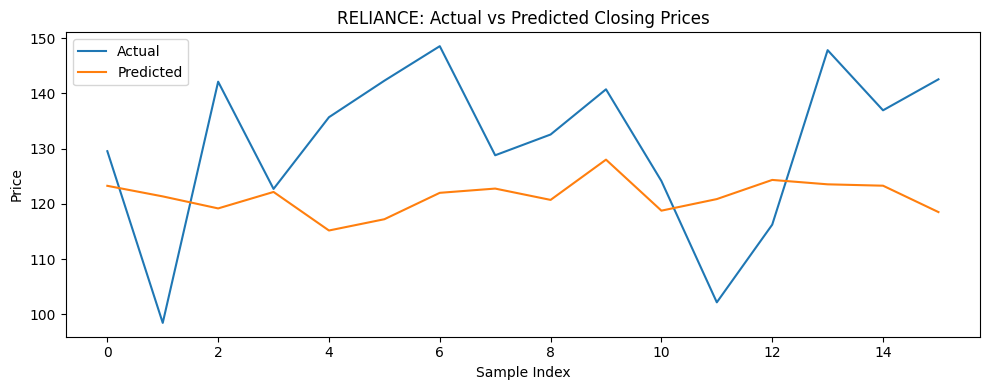

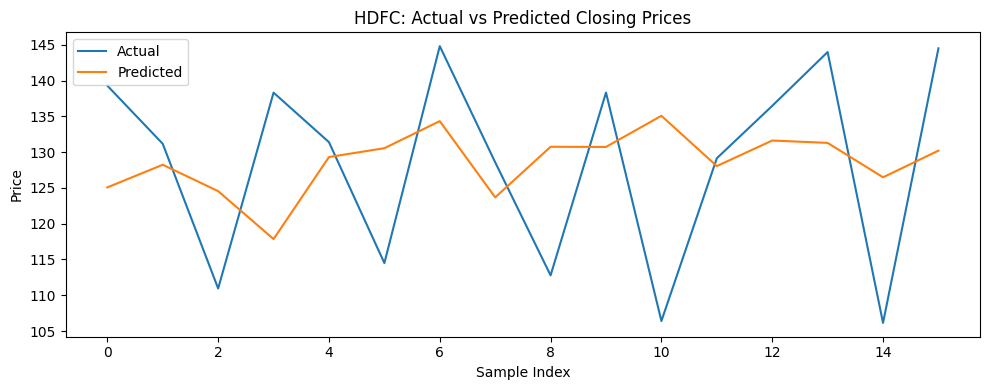

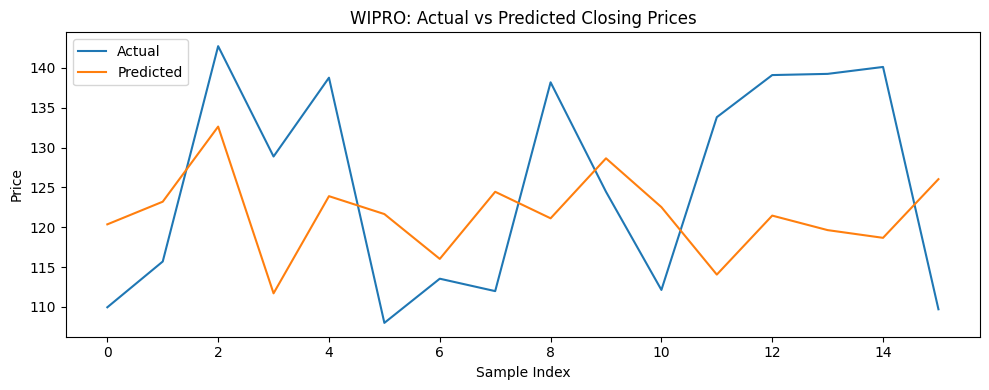

In [88]:
for stock in stock_names:
    stock_df = df[df['Stock'] == stock].copy()
    stock_df = stock_df.sort_values('Date')

    stock_df['MA_5'] = stock_df['Close'].rolling(window=5).mean()
    stock_df['MA_10'] = stock_df['Close'].rolling(window=10).mean()
    stock_df['Daily_Return'] = stock_df['Close'].pct_change()
    stock_df['Target'] = stock_df['Close'].shift(-1)
    stock_df.dropna(inplace=True)

    X = stock_df[['Open', 'High', 'Low', 'Close', 'Volume', 'MA_5', 'MA_10', 'Daily_Return']]
    y = stock_df['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.figure(figsize=(10, 4))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(f'{stock}: Actual vs Predicted Closing Prices')
    plt.xlabel('Sample Index')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

**Return Distribution Plot Code**

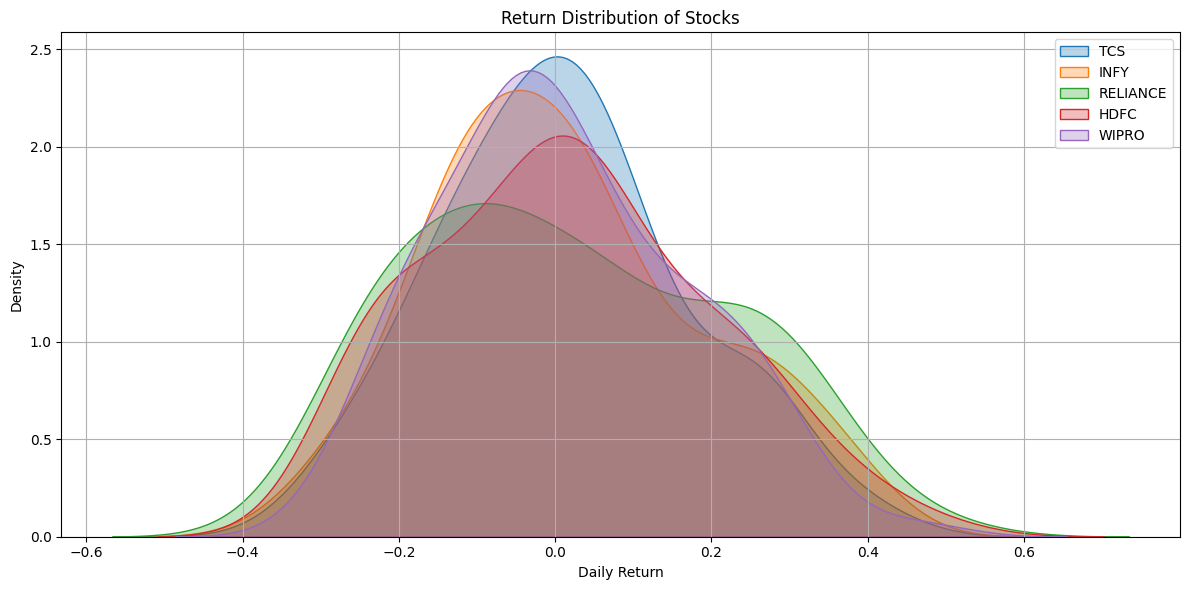

In [89]:
import seaborn as sns
plt.figure(figsize=(12, 6))

for stock in stock_names:
    stock_df = df[df['Stock'] == stock].copy()
    stock_df = stock_df.sort_values('Date')
    stock_df['Daily_Return'] = stock_df['Close'].pct_change()
    stock_df.dropna(inplace=True)

    sns.kdeplot(stock_df['Daily_Return'], label=stock, fill=True, alpha=0.3)


plt.title('Return Distribution of Stocks')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Future Forecasting (Next 7 Days)**



1.   train a Linear Regression model specifically for the stock TCS
2.   next 7 business days



Root Mean Squared Error for TCS: 15.79


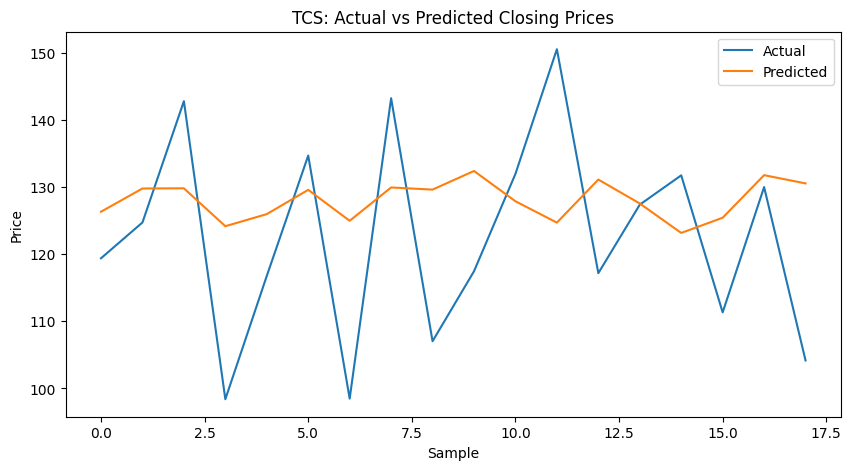

In [90]:
stock_df = df[df['Stock'] == 'TCS'].copy()
stock_df = stock_df.sort_values('Date')

stock_df['Next_Close'] = stock_df['Close'].shift(-1)
stock_df.dropna(inplace=True)

X = stock_df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = stock_df['Next_Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error for TCS: {rmse:.2f}")

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('TCS: Actual vs Predicted Closing Prices')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.legend()
plt.show()

In [91]:
from datetime import timedelta


future_days = 7
last_known = stock_df.iloc[-1].copy()
future_dates = pd.date_range(start=stock_df['Date'].max() + timedelta(days=1), periods=future_days, freq='B')
future_predictions = []

for date in future_dates:

    features = {
        'Open': last_known['Open'],
        'High': last_known['High'],
        'Low': last_known['Low'],
        'Close': last_known['Close'],
        'Volume': last_known['Volume']
    }

    input_df = pd.DataFrame([features])
    predicted_close = model.predict(input_df)[0]


    future_predictions.append({
        'Date': date,
        'Predicted_Close': predicted_close
    })


    last_known['Open'] = last_known['Close']
    last_known['High'] = max(last_known['Close'], predicted_close)
    last_known['Low'] = min(last_known['Close'], predicted_close)
    last_known['Close'] = predicted_close
    last_known['Volume'] = last_known['Volume']


future_df = pd.DataFrame(future_predictions)
print("\n Future Forecast for Next 7 Days:")
print(future_df)




 Future Forecast for Next 7 Days:
        Date  Predicted_Close
0 2024-05-29     1.210278e+02
1 2024-05-30     3.440573e+03
2 2024-05-31     1.433251e+06
3 2024-06-03     6.172849e+08
4 2024-06-04     2.658784e+11
5 2024-06-05     1.145198e+14
6 2024-06-06     4.932625e+16


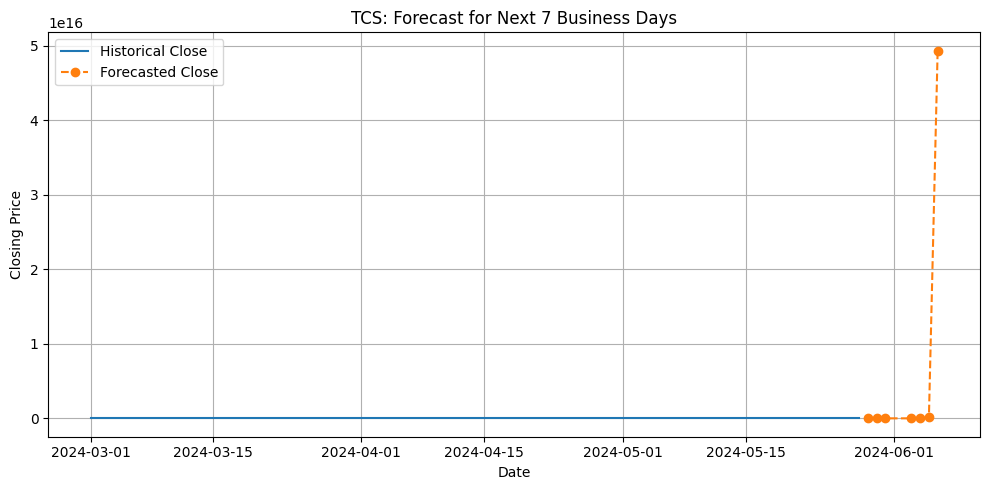

In [92]:
plt.figure(figsize=(10, 5))
plt.plot(stock_df['Date'], stock_df['Close'], label='Historical Close')
plt.plot(future_df['Date'], future_df['Predicted_Close'], label='Forecasted Close', linestyle='--', marker='o')
plt.title(f"{stock_df['Stock'].iloc[0]}: Forecast for Next 7 Business Days")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()